# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import TruncatedSVD

from scipy.optimize import minimize
%matplotlib inline

## Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
for i in range(len(raitings)):
    chk_cos = 0
    x = raitings[i]
    for j in range(len(raitings)):
        if j != i:
            y = raitings[j]
            cos = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
            if cos > chk_cos:
                chk_cos = cos
                pair = j
    print(i, pair, chk_cos)

0 8 0.9106598233573044
1 4 0.8713805223930228
2 9 0.9187305147356807
3 9 0.8588686958710952
4 8 0.8794847716076252
5 9 0.8551490764118892
6 3 0.832742107055763
7 5 0.8445168512565341
8 0 0.9106598233573044
9 2 0.9187305147356807


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [4]:
svd = TruncatedSVD(n_components=5)
svd = svd.fit(raitings)
svd = svd.transform(raitings)
print(svd)

[[23.41982063 -5.36092136  3.83196779 -4.06950174  1.10267269]
 [24.76774917  4.52188701  1.35815965  1.58128545  8.59912002]
 [22.27728589 -6.96492049 -4.84461485 -0.47661647  3.37152266]
 [19.4257757   2.64575227 -6.86014009 -4.76604765  1.96075707]
 [22.8146354   0.51464093  7.70180188  4.42379773  1.29124163]
 [21.76961656  1.94294987 -4.56934779  8.32306487 -2.21887359]
 [21.23427453  9.78047778  1.16340271 -4.86074521 -2.60815471]
 [19.97476815  4.00048677 -1.67456316  1.1512346  -3.5637169 ]
 [26.39306998 -3.03090482  5.86422753 -1.67503491 -3.71500141]
 [29.94016844 -4.82012297 -3.48912415  0.05527083 -3.62526487]]


## Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [5]:
from scipy.misc import derivative

In [6]:
def f(x):
    return np.tan(np.sin(x) + np.cos(2*x+3))**2

print(derivative(f, 1.0, dx=1e-6, n=1))

55.3859176464222


$2tg(sin(x)+cos(2x+3))*(1 + tg^2(sin(x)+cos(2x+3)))*(cos(x)-2*sin(2x+3))$

In [7]:
paper = 2*(math.sin(math.sin(1)+math.cos(2*1+3))/(math.cos(math.sin(1)+math.cos(2*1+3)))**3)*(math.cos(1)-2*math.sin(2*1+3))
print(paper)

55.385917635337854


## Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [8]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [9]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [10]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

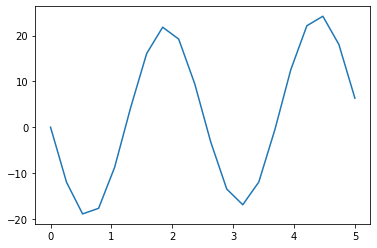

In [11]:
plt.plot(x, fx)
plt.show()

In [12]:
def error(params):
    return np.sum([np.abs(fx[i] - f(x[i], params[0], params[1]))for i in range(len(x))])

In [13]:
from scipy.optimize import differential_evolution

In [14]:
bounds = [(-20, 20), (-20, 20)]
result = differential_evolution(error, bounds, seed = 42)
print(result)
print('Параметры a, b - {}'.format(result.x))

     fun: 1.5125979224706043e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])
Параметры a, b - [ 3.  -2.5]


## Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [15]:
discrete = np.random.randint(10, 100, size = 20)
print(discrete)

[59 87 29 80 71 58 62 87 30 16 80 40 52 37 96 90 19 31 45 95]


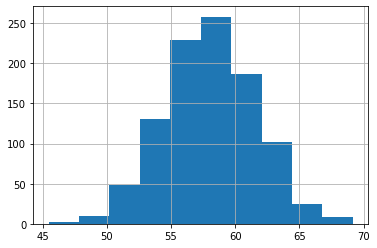

In [16]:
means = []
for i in range(1000):
    rand = np.random.choice(discrete, size=50)
    means.append(np.mean(rand))
    
plt.hist(means)
plt.grid()
plt.show()

## Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [17]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [18]:
a, U = np.linalg.eig(m)
print(f'Собственные числа: \n{a}')
print(f'Собственные вектора: \n{U}')

Собственные числа: 
[ 3. -1.]
Собственные вектора: 
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
